## OLCPandas key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/08_olc.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [ ]:
# %pip install vgridpandas

### Latlong to OLC

In [ ]:
import pandas as pd
from vgridpandas import olcpandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.775299665325505], 'lon':[106.70647975040788,-171.58256682775985]})
resolution = 2
df = df.olc.latlon2olc(resolution)
df

### OLC to geo boundary

In [ ]:
df = df.olc.olc2geo()
df


### (Multi)Linestring/ (Multi)Polygon to OLC

Generating OLC DGGS: 100%|██████████| 162/162 [00:00<00:00, 10805.59 cells/s]


<Axes: >

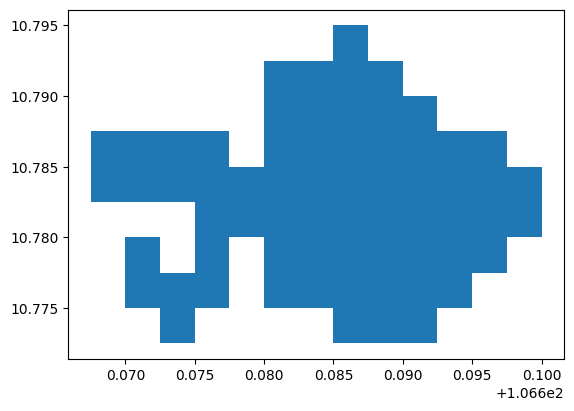

In [12]:
import geopandas as gpd
from vgridpandas import olcpandas

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 8
gdf_polyfill = gdf.olc.polyfill(resolution, predicate = "intersects", compact = True)
gdf_polyfill = gdf_polyfill.olc.olc2geo(olc_column = "olc_polyfill")
gdf_polyfill.plot()

### OLC point binning

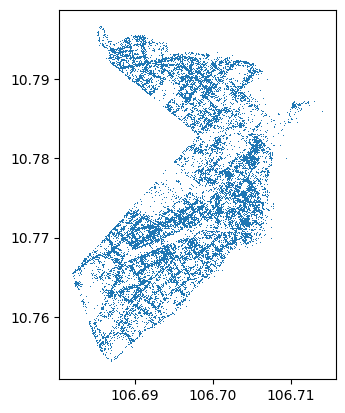

In [14]:
resolution = 10
# df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "count"
df_bin = df.olc.olcbin(resolution=resolution, stats = stats, return_geometry=True)
df_bin.plot()
df_bin.to_file("dist1_pois_olc.geojson", driver="GeoJSON")